In [1]:
import sys
sys.path.append("../../src")
from sumstats import plot_hist
from sumstats import class_count

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import aligned and frequency-reduced variant counts
These tables have been aligned with the subtype target, and eliminated features that are nonzero in <0.05 or >0.95 of subjects.

In [2]:
wes_dn = "../wes/data"

vc = pd.read_csv(os.path.join(wes_dn, "200825_aligned_applythres_vc.csv"), header=0, index_col=0)
snpvc = pd.read_csv(os.path.join(wes_dn, "200825_aligned_applythres_snp_vc.csv"), header=0, index_col=0)
indelvc = pd.read_csv(os.path.join(wes_dn, "200825_aligned_applythres_indel_vc.csv"), header=0, index_col=0)

# Import subtype

In [3]:
subtype_fn = "aligned_subtype.csv"

st = pd.read_csv(os.path.join(wes_dn, subtype_fn), index_col=0, header=0)

In [4]:
cc_table = class_count(np.array(st, dtype=int).ravel())
display(cc_table)

,Counts
Subtype 1,172
Subtype 2,47
Subtype 3,132


# Summary stats of original count matrix

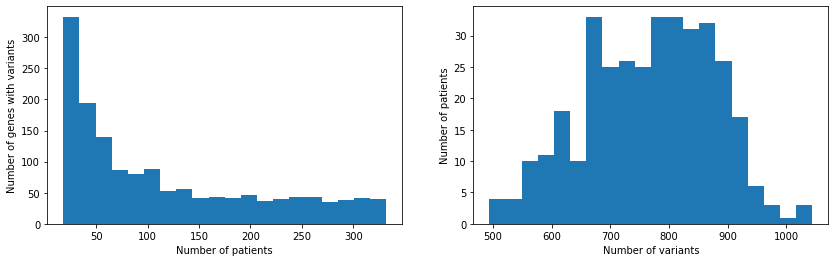

In [5]:
plot_hist(np.array(vc))

In [6]:
print("Mean number of variants per patient: {:.1f} (+/-{:.1f})".format(np.mean(np.sum(vc, axis=1)), np.std(np.sum(vc, axis=1))))

X = np.array(vc)
vals = []
for i in range(X.shape[1]):
    ct = 0
    for j in range(len(X[:,i])):
        if X[j,i] > 0:
            ct += 1
        else:
            continue
    vals.append(ct)
print("Mean number of patients with variant per gene: {:.1f} (+/-{:.1f}): ".format(np.mean(vals), np.std(vals)))

Mean number of variants per patient: 767.0 (+/-108.7)
Mean number of patients with variant per gene: 116.0 (+/-93.1): 


# Assess whether (snp + indels) match count in original matrix

In [7]:
f_index = [] # indices where sum doesn't match will be stored here 
for i in range(len(vc.columns)): # for all genes in original VC columns
    origcol = vc.iloc[:,i]
    colname = vc.columns[i]
    snpcol = snpvc.loc[:][colname]
    indelcol = indelvc.loc[:][colname]
    if all((np.array(snpcol) + np.array(indelcol)) == np.array(origcol)):
        continue
    else:
        f_index.append(i)

print("The number of columns where counts DO NOT add up: ", len(f_index))

The number of columns where counts DO NOT add up:  0


# Summary statistics of SNPs

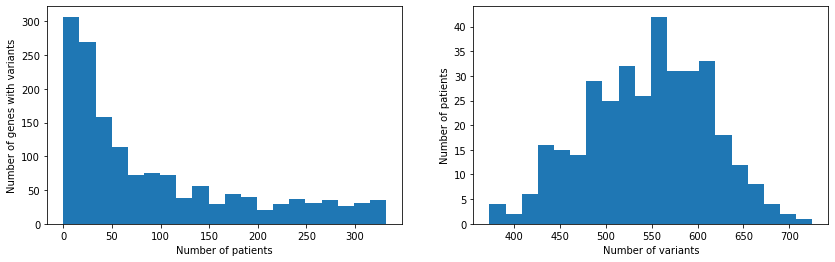

In [8]:
from sumstats import plot_hist
plot_hist(np.array(snpvc))

In [9]:
print("Mean number of SNPs per patient: {:.1f} (+/-{:.1f})".format(np.mean(np.sum(snpvc, axis=1)), np.std(np.sum(snpvc, axis=1))))

X = np.array(snpvc)
vals = []
for i in range(X.shape[1]):
    ct = 0
    for j in range(len(X[:,i])):
        if X[j,i] > 0:
            ct += 1
        else:
            continue
    vals.append(ct)
print("Mean number of patients with a SNP per gene: {:.1f} (+/-{:.1f}): ".format(np.mean(vals), np.std(vals)))

Mean number of SNPs per patient: 546.1 (+/-66.5)
Mean number of patients with a SNP per gene: 91.5 (+/-93.2): 


# Summary statistics of indels

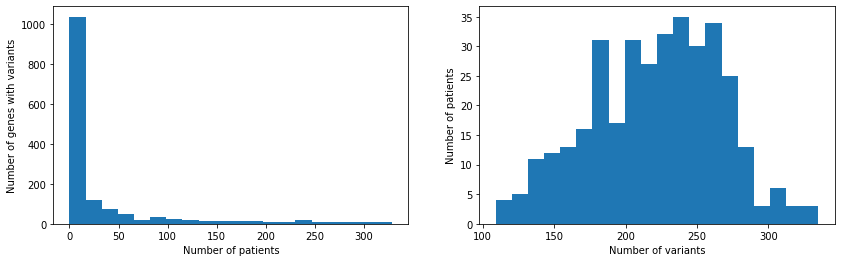

In [10]:
plot_hist(np.array(indelvc))

In [11]:
print("Mean number of indels per patient: {:.1f} (+/-{:.1f})".format(np.mean(np.sum(indelvc, axis=1)), np.std(np.sum(indelvc, axis=1))))

X = np.array(indelvc)
vals = []
for i in range(X.shape[1]):
    ct = 0
    for j in range(len(X[:,i])):
        if X[j,i] > 0:
            ct += 1
        else:
            continue
    vals.append(ct)
print("Mean number of patients with a indel per gene: {:.1f} (+/-{:.1f}): ".format(np.mean(vals), np.std(vals)))

Mean number of indels per patient: 220.9 (+/-45.1)
Mean number of patients with a indel per gene: 33.6 (+/-67.1): 


# Boxplots of number of variants

In [12]:
def boxplots(vc, snpvc, indelvc, target): # add "allvc, allsnp, allindel,"  for non-deleterious mutations
    sumstats = {}
    sumstats["all"] = {"mean" : np.mean(np.sum(vc, axis=1)), "sd" : np.std(np.sum(vc, axis=1))}
    sumstats["snp"] = {"mean" : np.mean(np.sum(snpvc, axis=1)), "sd" : np.std(np.sum(snpvc, axis=1))}
    sumstats["indel"] = {"mean" : np.mean(np.sum(indelvc, axis=1)), "sd" : np.std(np.sum(indelvc, axis=1))}
    
    labels = ["All", "SNPs", "Indels"]
    subtypes = ["Subtype I", "Subtype II", "Subtype III"]
    fs = 16
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True)
    
    for i in range(3):
        data = np.concatenate((
                np.array(np.sum(vc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1)), 
                np.array(np.sum(snpvc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1)), 
                np.array(np.sum(indelvc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1))
            ), axis=1
        )
        
        axes[i].boxplot(data, labels=labels, widths=(.6, .6, .6)) # add "showfliers=False" to not show the ones outside the whiskers 
        axes[i].set_title(subtypes[i], fontsize=fs)
        
    axes[0].set_ylabel("Number of variants", fontsize=fs)

#     for i in range(3):
#         data = np.concatenate((
#                 np.array(np.sum(vc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1)), 
#                 np.array(np.sum(snpvc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1)), 
#                 np.array(np.sum(indelvc.iloc[(st == (i+1)).values, :], axis=1)).reshape((-1,1))
#             ), axis=1
#         )
        
#         axes[1, i].boxplot(data, labels=labels) # add "showfliers=False" to not show the ones outside the whiskers 
#         axes[1, i].set_title(subtypes[i], fontsize=fs)

    fig.subplots_adjust(hspace=0.4)
    
    return sumstats, fig

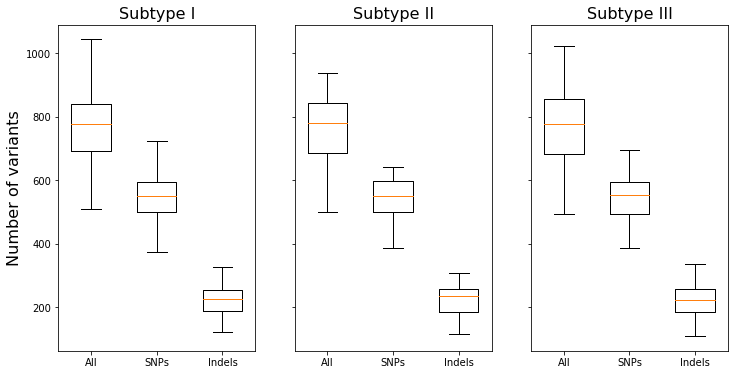

In [13]:
sumstats, fig = boxplots(vc, snpvc, indelvc, st)
# fig.savefig("vc_snp_indel_boxplots.png")

# Demographic summary stats

In [14]:
from AddDemographic import DemoData

In [15]:
demo_df = DemoData("../demo_data/Screening___Demographics.csv", patid_list=vc.index)

In [16]:
# Gender compositions of the subtypes
print("Subtype I & Male: ", np.sum((demo_df["Gender 2"] == 1) & np.array(st == 1).reshape((-1,))))
print("Subtype II & Male: ", np.sum((demo_df["Gender 2"] == 1) & np.array(st == 2).reshape((-1,))))
print("Subtype III & Male: ", np.sum((demo_df["Gender 2"] == 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & Female: ", np.sum((demo_df["Gender 1"] == 1) & np.array(st == 1).reshape((-1,))))
print("Subtype II & Female: ", np.sum((demo_df["Gender 1"] == 1) & np.array(st == 2).reshape((-1,))))
print("Subtype III & Female: ", np.sum((demo_df["Gender 1"] == 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & Unspecified: ", np.sum(((demo_df["Gender 1"] != 1) & (demo_df["Gender 2"] != 1)) & np.array(st == 1).reshape((-1,))))
print("Subtype I & Unspecified: ", np.sum(((demo_df["Gender 1"] != 1) & (demo_df["Gender 2"] != 1)) & np.array(st == 2).reshape((-1,))))
print("Subtype I & Unspecified: ", np.sum(((demo_df["Gender 1"] != 1) & (demo_df["Gender 2"] != 1)) & np.array(st == 3).reshape((-1,))))

Subtype I & Male:  107
Subtype II & Male:  27
Subtype III & Male:  95

Subtype I & Female:  52
Subtype II & Female:  17
Subtype III & Female:  33

Subtype I & Unspecified:  13
Subtype I & Unspecified:  3
Subtype I & Unspecified:  4


In [17]:
# Race compositions of the subtypes
print("Overall Asian: ", np.sum((demo_df["Asian"] == 1)))
print("Overall Black: ", np.sum((demo_df["Black"] == 1)))
print("Overall White: ", np.sum((demo_df["White"] >= 1)))
print("Overall Unspecified: ", np.sum((demo_df["Asian"] == 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & Asian: ", np.sum((demo_df["Asian"] == 1) & np.array(st == 1).reshape((-1,))))
print("Subtype II & Asian: ", np.sum((demo_df["Asian"] == 1) & np.array(st == 2).reshape((-1,))))
print("Subtype III & Asian: ", np.sum((demo_df["Asian"] == 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & Black: ", np.sum((demo_df["Black"] == 1) & np.array(st == 1).reshape((-1,))))
print("Subtype II & Black: ", np.sum((demo_df["Black"] == 1) & np.array(st == 2).reshape((-1,))))
print("Subtype III & Black: ", np.sum((demo_df["Black"] == 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & White: ", np.sum((demo_df["White"] >= 1) & np.array(st == 1).reshape((-1,))))
print("Subtype II & White: ", np.sum((demo_df["White"] >= 1) & np.array(st == 2).reshape((-1,))))
print("Subtype III & White: ", np.sum((demo_df["White"] >= 1) & np.array(st == 3).reshape((-1,))))
print("")
print("Subtype I & Unspecified: ", np.sum((np.sum(demo_df.loc[:][["Asian", "Black", "White"]], axis=1) == 0) & np.array(st == 1).reshape((-1,))))
print("Subtype II & Unspecified: ", np.sum((np.sum(demo_df.loc[:][["Asian", "Black", "White"]], axis=1) == 0) & np.array(st == 2).reshape((-1,))))
print("Subtype III & Unspecified: ", np.sum((np.sum(demo_df.loc[:][["Asian", "Black", "White"]], axis=1) == 0) & np.array(st == 3).reshape((-1,))))

Overall Asian:  8
Overall Black:  7
Overall White:  334
Overall Unspecified:  4

Subtype I & Asian:  3
Subtype II & Asian:  1
Subtype III & Asian:  4

Subtype I & Black:  1
Subtype II & Black:  2
Subtype III & Black:  4

Subtype I & White:  167
Subtype II & White:  45
Subtype III & White:  122

Subtype I & Unspecified:  2
Subtype II & Unspecified:  0
Subtype III & Unspecified:  2


In [18]:
age_one = demo_df["Age"].values[np.array(st).reshape((-1,)) == 1]
age_two = demo_df["Age"].values[np.array(st).reshape((-1,)) == 2]
age_three = demo_df["Age"].values[np.array(st).reshape((-1,)) == 3]

In [19]:
print("Mean age of patients in Subtype I: {:.2f} (+/-{:.1f})".format(np.mean(age_one), np.std(age_one)))
print("Mean age of patients in Subtype I: {:.2f} (+/-{:.1f})".format(np.mean(age_two), np.std(age_two)))
print("Mean age of patients in Subtype I: {:.2f} (+/-{:.1f})".format(np.mean(age_three), np.std(age_three)))

Mean age of patients in Subtype I: 58.27 (+/-9.5)
Mean age of patients in Subtype I: 63.04 (+/-9.7)
Mean age of patients in Subtype I: 65.33 (+/-8.4)


In [20]:
print(np.mean(demo_df["Age"]), np.std(demo_df["Age"]))

61.56410256410256 9.725624463403664


Text(0.5, 1.0, 'Histogram of age')

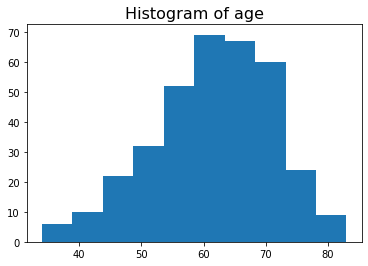

In [21]:
plt.hist(demo_df["Age"])
plt.title("Histogram of age", size=16)

Text(0.5, 1.0, 'Bar graph of gender composition')

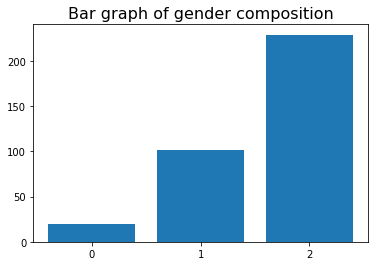

In [22]:
plt.bar(
    [0,1,2], 
    [np.sum((demo_df["Gender 1"] != 1) & (demo_df["Gender 2"] != 1)), # neither one or two
     np.sum(demo_df["Gender 1"] == 1), # gender 1
     np.sum(demo_df["Gender 2"] == 1)], # gender 2
    tick_label=["0", "1", "2"]
)
plt.title("Bar graph of gender composition", size=16)

Text(0.5, 1.0, 'Bar graph of race composition')

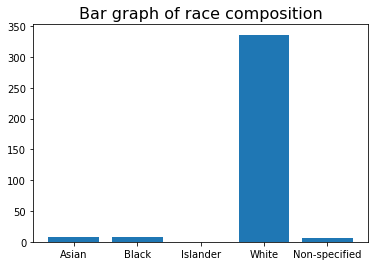

In [23]:
plt.bar(
    [0,1,2,3,4],
    [np.sum(demo_df["Asian"]), 
     np.sum(demo_df["Black"]), 
     np.sum(demo_df["Islander"]), 
     np.sum(demo_df["White"]), 
     np.sum((demo_df["Asian"] != 1) & (demo_df["Black"] != 1) & (demo_df["Islander"] != 1) & (demo_df["White"] != 1))],
    tick_label=["Asian", "Black", "Islander", "White", "Non-specified"]
)
plt.title("Bar graph of race composition", size=16)

# Identify subjects with unexpected racial values

In [24]:
for i in range(demo_df.shape[0]):
    if (demo_df["Asian"][i] + demo_df["Black"][i] + demo_df["Islander"][i] + demo_df["White"][i]) > 1:
        print(demo_df.index[i])

PPMI_SI_3431
PPMI_SI_3608
PPMI_SI_3900
PPMI_SI_4093
